In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import ConnectionPatch

In [13]:
df_north = pd.read_csv('../../data/DATA_2_north.csv', delimiter=',', parse_dates=['Datetime'])
df_south = pd.read_csv('../../data/DATA_2_south.csv', delimiter=',', parse_dates=['Datetime'])

<AxesSubplot:xlabel='Magnitude'>

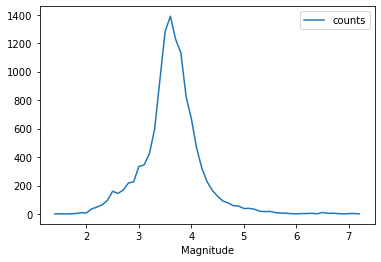

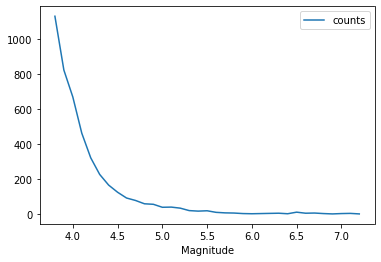

In [14]:
df_magnitude_count = df_north[["Magnitude"]].groupby(["Magnitude"]).size().reset_index(name='counts')
df_magnitude_count.plot(x="Magnitude",y="counts")

df_north=df_north.loc[df_north.Magnitude >= 3.8]
df_north.reset_index(drop=True,inplace=True)

df_magnitude_count = df_north[["Magnitude"]].groupby(["Magnitude"]).size().reset_index(name='counts')
df_magnitude_count.plot(x="Magnitude",y="counts")

<br>
<h2> b - value analysis </h2>

<p>s
The Magnitude count stops accelerating accelerating at 3.8, thus we will choose 3.8 as the cut-off magnitude.
</p><br>

<AxesSubplot:xlabel='Magnitude'>

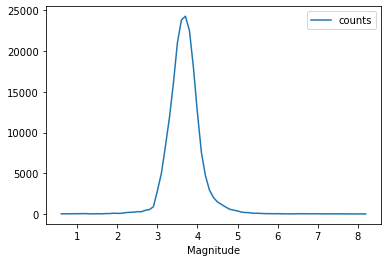

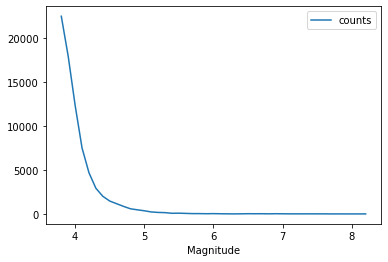

In [15]:
df_magnitude_count = df_south[["Magnitude"]].groupby(["Magnitude"]).size().reset_index(name='counts')
df_magnitude_count.plot(x="Magnitude",y="counts")

df_south=df_south.loc[df_south.Magnitude >= 3.8]
df_south.reset_index(drop=True,inplace=True)

df_magnitude_count = df_south[["Magnitude"]].groupby(["Magnitude"]).size().reset_index(name='counts')
df_magnitude_count.plot(x="Magnitude",y="counts")

<br>
<h2> b - value analysis </h2>

<p>s
The Magnitude count stops accelerating accelerating at 3.8, thus we will choose 3.8 as the cut-off magnitude.
</p><br>

In [74]:
def b_value(x):
     return x._get_numeric_data().apply(axis=0, func=np.log).mean()

In [75]:
df_yearly_magnitude = df_north.groupby(df_north.Datetime.dt.year)["Magnitude"]
df_yearly_magnitude_mean = df_yearly_magnitude.mean()
df_yearly_count = df_yearly_magnitude.count()
df_yearly_variance = df_yearly_magnitude.var()
df_yearly_b_val = df_yearly_magnitude_mean.apply(lambda x: (np.log(np.e))/(x-3.8))

<AxesSubplot:title={'center':'Variance'}, xlabel='Datetime'>

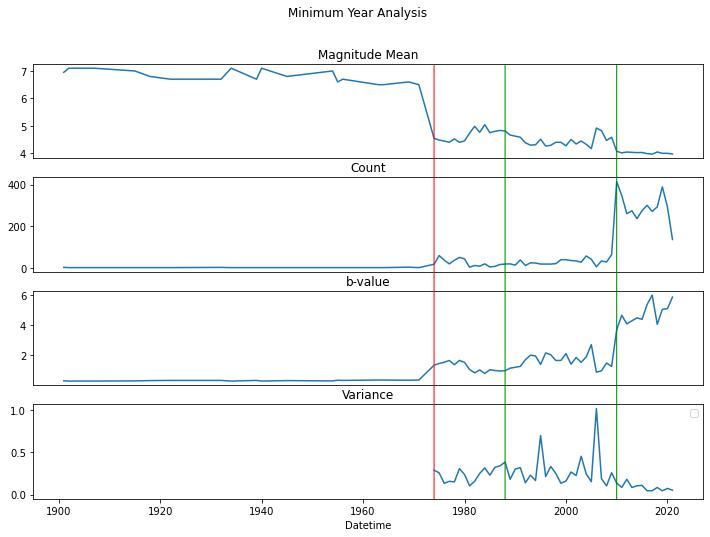

In [76]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.suptitle('Minimum Year Analysis')
fig.set_size_inches(12, 8)
minimum_year_1=1974
minimum_year_2=1988
minimum_year_3=2010

con1 = ConnectionPatch(xyA=[minimum_year_1,7.2], xyB=[minimum_year_1,-.05], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="red")
con2 = ConnectionPatch(xyA=[minimum_year_2,7.2], xyB=[minimum_year_2,-.05], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="red")
con3 = ConnectionPatch(xyA=[minimum_year_3,7.2], xyB=[minimum_year_3,-.05], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="green")

fig.add_artist(con1)
fig.add_artist(con2)
fig.add_artist(con3)

plt.legend(["red", "green"])
df_yearly_magnitude_mean.plot(ax=axes[0],kind="line",xlabel="",xticks=[],title="Magnitude Mean",legend=[])
df_yearly_count.plot(ax=axes[1],kind="line",title="Count",xlabel="",xticks=[])
df_yearly_b_val.plot(ax=axes[2],kind="line",title="b-value",xlabel="",xticks=[])
df_yearly_variance.plot(ax=axes[3],kind="line",title="Variance")

In [77]:
df_yearly_magnitude = df_south.groupby(df_south.Datetime.dt.year)["Magnitude"]
df_yearly_magnitude_mean = df_yearly_magnitude.mean()
df_yearly_count = df_yearly_magnitude.count()
df_yearly_variance = df_yearly_magnitude.var()
df_yearly_b_val = df_yearly_magnitude_mean.apply(lambda x: (np.log(np.e))/(x-3.8))

<AxesSubplot:title={'center':'Variance'}, xlabel='Datetime'>

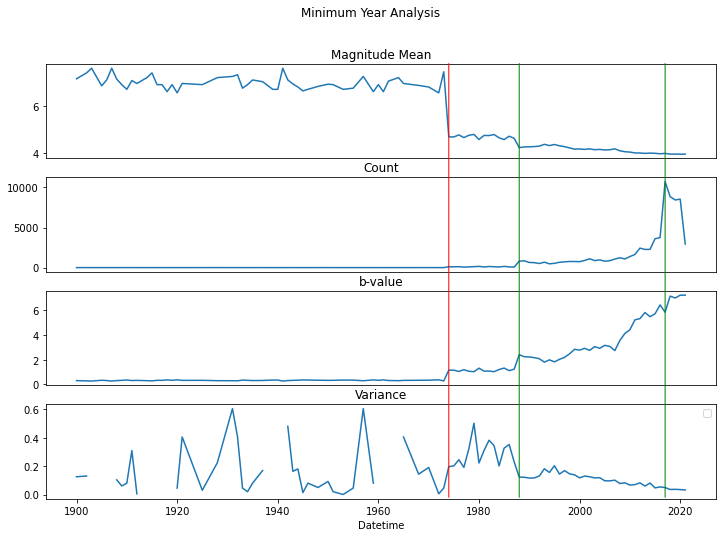

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.suptitle('Minimum Year Analysis')
fig.set_size_inches(12, 8)
minimum_year_1=1974
minimum_year_2=1988
minimum_year_3=2017

con1 = ConnectionPatch(xyA=[minimum_year_1,7.8], xyB=[minimum_year_1,-.02], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="red")
con2 = ConnectionPatch(xyA=[minimum_year_2,7.8], xyB=[minimum_year_2,-.02], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="red")
con3 = ConnectionPatch(xyA=[minimum_year_3,7.8], xyB=[minimum_year_3,-.02], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="green")

fig.add_artist(con1)
fig.add_artist(con2)
fig.add_artist(con3)

plt.legend(["red", "green"])
df_yearly_magnitude_mean.plot(ax=axes[0],kind="line",xlabel="",xticks=[],title="Magnitude Mean",legend=[])
df_yearly_count.plot(ax=axes[1],kind="line",title="Count",xlabel="",xticks=[])
df_yearly_b_val.plot(ax=axes[2],kind="line",title="b-value",xlabel="",xticks=[])
df_yearly_variance.plot(ax=axes[3],kind="line",title="Variance")

In [79]:
df_north=df_north[df_north.Datetime.dt.year >= 2010]
df_south=df_south[df_south.Datetime.dt.year >= 2017]

In [80]:
df_north.to_csv("../../data/DATA_3_north.csv", index=False)
df_south.to_csv("../../data/DATA_3_south.csv", index=False)